# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [1]:
import math
 
def heapify(listOfPoints,lowPoint, size , i):
    #i isa the root of the subtree
    largest = i 
    left = 2*i +1
    right = 2*i +2
    #check if left child exists and is bigger than root
    if left < size and polarAngle(listOfPoints[largest], lowPoint) < polarAngle(listOfPoints[left], lowPoint) :
        largest = left
    #same with right child and being bigger than the largest
    if right < size and  polarAngle(listOfPoints[largest], lowPoint) < polarAngle(listOfPoints[right], lowPoint):
        largest = right
    # if it changed swap
    if largest != i :
        (listOfPoints[i], listOfPoints[largest]) = (listOfPoints[largest], listOfPoints[i])
        #apply the function again on the swapped root's new subtree
        heapify(listOfPoints, lowPoint, size, largest)

def heapsort(listOfPoints, lowPoint):
    n = len(listOfPoints)
    #start at the last parent which is located at index n/2 - 1
    # we build the heap from the bottom up
    for i in range (n//2 -1, -1, -1):
        heapify (listOfPoints, lowPoint,n, i)

    for i in range(n-1, 0 , -1):
        listOfPoints[i], listOfPoints[0] = listOfPoints[0], listOfPoints[i]
        #heapify the root after swapping(sinking)
        heapify (listOfPoints, lowPoint, i, 0)

def Radius(point, lowPoint):
    #compute the distance in with the reference in case two colinear points are found
    r = math.sqrt((((point[0] - lowPoint[0])**2) + ((point[1] - lowPoint[1])**2)))
    return r

def polarAngle (point, lowPoint):
    Y_total = point[1] - lowPoint[1]
    X_total = point[0] - lowPoint[0]
    if Y_total == 0 and X_total == 0:
        return -math.inf #different from 0 so as to not cause any problem for any angle comparison as it is a special point
    else :
        return math.atan2(Y_total,X_total)    

    
#function to find lowest and leftmost point
def lowy_left(inputData):
    lowPoint = [math.inf, math.inf]
    for point in inputData:
        #find the point with the lowest y coordinate
        if point[1] < lowPoint[1]:
            lowPoint[0] = point [0]
            lowPoint[1] = point [1]
        #if two points have the same y check which one has the smaller x coordinate
        elif point[1] == lowPoint[1] and point[0] < lowPoint[0]:
            lowPoint[0] = point [0]
            lowPoint[1] = point [1]
    return lowPoint

def removeColinear(sortedPoints, lowPoint):
    for i in range(len(sortedPoints)-1, 0, -1):
        if polarAngle(sortedPoints[i], lowPoint) == polarAngle(sortedPoints[i-1], lowPoint) :
            if Radius(sortedPoints[i], lowPoint) <= Radius(sortedPoints[i-1], lowPoint):
                del sortedPoints[i]
            else :
                del sortedPoints[i-1]

def clockwiseTurns(p1, p2, p3):
    #the function calculates the z coordinate of the cross product of the vectors p1p2 and p1p3
    #with p1 being the point below the top of the stack
    #p2 being the top of the stack
    #and p3 being the current point
    #if it is positive the turn is counter-clockwise and if negative clockwise
    return ((p2[0]-p1[0])*(p3[1]-p1[1]) - (p2[1] - p1[1])*(p3[0]-p1[0]))

def cross_product(p1,p2,p3):
    y1 = p1[1] - p2[1]
    y2 = p1[1] - p3[1]
    x1 = p1[0] - p2[0]
    x2 = p1[0] - p3[0]
    return y2 * x1 - y1 * x2
    
def grahamscan(inputSet):
    #let points be the list of points
    points = inputSet #list of points
    outputSet = [] #outputSet is used as a stack
    
    #find the lowest y-coordinate and leftmost point, called P0
    lowPoint = lowy_left(inputSet)
    heapsort(points, lowPoint)
    removeColinear(points,lowPoint)

    for currentPoint in points:
        while len(outputSet) > 1 and clockwiseTurns(outputSet[-2], outputSet[-1], currentPoint) <= 0:   
            outputSet.pop()
        outputSet.append(currentPoint)    
    return outputSet 

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [2]:
import random

maximumX = 32767
maximumY = 32767
minX = 0
minY = 0
mid = [(maximumX-minX)/2, (maximumY-minY)/2]
data_points = [100,500,1000,5000,10000,15000,20000]

# code for random data generation
def random_data_generation(n):
    points = []
    for p in range(n):
        while True:
            x = random.randint(minX, maximumX)
            y = random.randint(minY, maximumY)
            point = [x,y]
            if point not in points:
                break
        points.append(point) 
    return points

# code for worst case data generation
def worst_data_generation(n):
    points = [[1,1],[30000,1],[15000,30000]]
    while len(points)<=n:
        x = random.randint(1, 30000)
        y = random.randint(1, 30000)
        point = [x,y]
        if cross_product([1,1],point,[30000,1])<0 and cross_product([30000,1],point,[15000,30000])<0 and cross_product([15000,30000],point,[1,1])<0 and point not in points:
            points.append(point)
    return points

Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [3]:
import timeit

#test code for random data generation
def random_time(points, iterations):
    time_data = []
    data = random_data_generation(points)
    total_time = 0
    for i in range(iterations):
        start_time = timeit.default_timer()
        grahamscan(data)
        time = timeit.default_timer() - start_time
        time_data.append(time)
    return time_data

#test code for worst case data generation
def worst_time(points, iterations):
    time_data = []
    data = worst_data_generation(points)
    total_time = 0
    for i in range(iterations):
        start_time = timeit.default_timer()
        grahamscan(data)
        time = timeit.default_timer() - start_time
        time_data.append(time)
    return time_data

*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

## Plotting Graph

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# plot a scattergraph with a line of best fit for all execution timings across 5 iterations  
def plot_scatter(x, y):
    #plot scattergraph
    plt.scatter(x,y)
    plt.title("Scatterplot of Results through 5 Iterations")
    plt.xlabel("Number of Points")
    plt.ylabel("Time (sec)") 
    
    #plot best-fit line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.show()

## Test for Random Case

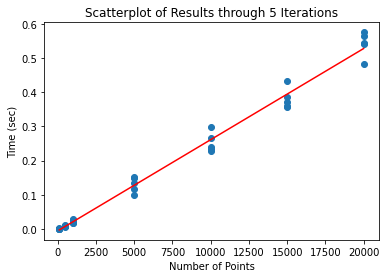

The mean time for random cases for 100 data points are: 0.0011996000000010555 seconds
The mean time for random cases for 500 data points are: 0.008844780000003993 seconds
The mean time for random cases for 1000 data points are: 0.02182687999999757 seconds
The mean time for random cases for 5000 data points are: 0.1305852999999985 seconds
The mean time for random cases for 10000 data points are: 0.25275878000000207 seconds
The mean time for random cases for 15000 data points are: 0.3817756199999991 seconds
The mean time for random cases for 20000 data points are: 0.5415673399999974 seconds


In [5]:
all_random_time = []
scatter_data = []
total_mean_time = []
count = 0
iterations = 5

for i in data_points:
    all_random_time = random_time(i, iterations)
    for data in all_random_time:
        scatter_data.append([i, data])

#plot scattergraph of results
input_xs, input_ys = zip(*scatter_data)
plot_scatter(input_xs, input_ys)

#to group tuple in groups of 5
def grouper(n, iterable): 
    args = [iter(iterable)] * n 
    return zip(*args) 

#print mean execution timings of each data point
group = tuple(grouper(5, input_ys))  
total_mean_time = [sum(tup) for tup in group]
for i in data_points:
    print("The mean time for random cases for", i, "data points are:", (total_mean_time[count]/5), "seconds")
    count += 1


## Test for Worst Case

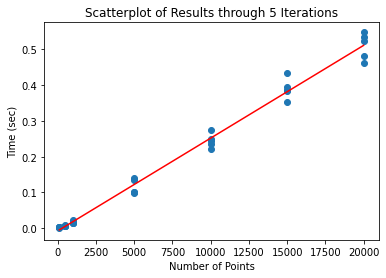

The mean time for worst cases for 100 data points are: 0.0019535000000018956 seconds
The mean time for worst cases for 500 data points are: 0.007211920000003147 seconds
The mean time for worst cases for 1000 data points are: 0.01717270000000326 seconds
The mean time for worst cases for 5000 data points are: 0.11500991999999996 seconds
The mean time for worst cases for 10000 data points are: 0.2450083599999971 seconds
The mean time for worst cases for 15000 data points are: 0.39060937999999795 seconds
The mean time for worst cases for 20000 data points are: 0.5101307200000008 seconds


In [6]:
all_worst_time = []
scatter_data = []
total_mean_time = []
count = 0
iterations = 5

for i in data_points:
    all_worst_time = worst_time(i, iterations)
    for data in all_worst_time:
        scatter_data.append([i, data])

#plot scattergraph of results
input_xs, input_ys = zip(*scatter_data)
plot_scatter(input_xs, input_ys)

#to group tuple in groups of 5
def grouper(n, iterable): 
    args = [iter(iterable)] * n 
    return zip(*args) 

#print mean execution timings of each data point
group = tuple(grouper(5, input_ys))  
total_mean_time = [sum(tup) for tup in group]
for i in data_points:
    print("The mean time for worst cases for", i, "data points are:", (total_mean_time[count]/5), "seconds")
    count += 1
